In [ ]:
#Clustering: Hierarchical  
#Dataset : 50_Startups.csv 
#Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
#Apply Hierarchical clustering algorithms (based on PROFIT column) to find the group of start-ups. 

         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

--- Missing Values ---
RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64


C:\Users\saris\AppData\Local\Temp\ipykernel_23584\1466203023.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PROFIT'].fillna(data['PROFIT'].mean(), inplace=True)


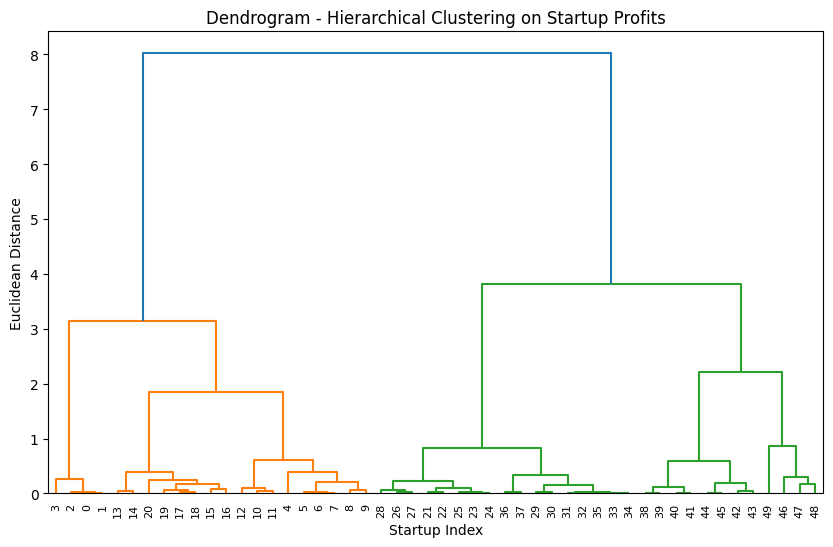


--- Cluster Summary ---
   Cluster           mean        min        max  count
0        1  149605.103333  118474.03  192261.83     21
1        2  101580.121176   89949.14  111313.02     17
2        3   61005.227500   14681.40   81229.06     12


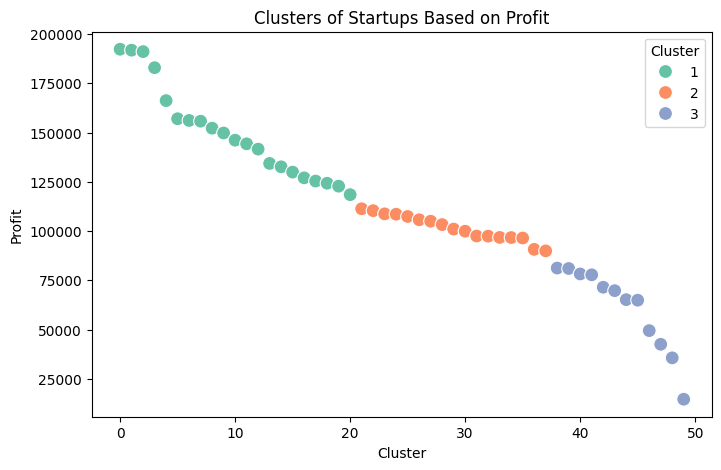


--- Sample Clustered Data ---
          RND      ADMIN        MKT  STATE     PROFIT  Cluster
0   165349.20  136897.80  471784.10      2  192261.83        1
1   162597.70  151377.59  443898.53      0  191792.06        1
2   153441.51  101145.55  407934.54      1  191050.39        1
3   144372.41  118671.85  383199.62      2  182901.99        1
4   142107.34   91391.77  366168.42      1  166187.94        1
5   131876.90   99814.71  362861.36      2  156991.12        1
6   134615.46  147198.87  127716.82      0  156122.51        1
7   130298.13  145530.06  323876.68      1  155752.60        1
8   120542.52  148718.95  311613.29      2  152211.77        1
9   123334.88  108679.17  304981.62      0  149759.96        1
10  101913.08  110594.11  229160.95      1  146121.95        1
11  100671.96   91790.61  249744.55      0  144259.40        1
12   93863.75  127320.38  249839.44      1  141585.52        1
13   91992.39  135495.07  252664.93      0  134307.35        1
14  119943.24  156547.42

In [3]:
# Hierarchical Clustering: Grouping Startups Based on Profit

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Load Dataset
df = pd.read_csv("50_Startups.csv")  
print(df.head())

# Step 3: Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 4: Encode Categorical Variable (STATE)
le = LabelEncoder()
df['STATE'] = le.fit_transform(df['STATE'])

# Step 5: Select Relevant Feature (Profit)
data = df[['PROFIT']].copy()

# Step 6: Handle Missing Values (if any)
data['PROFIT'].fillna(data['PROFIT'].mean(), inplace=True)

# Step 7: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['PROFIT']])

# Step 8: Perform Hierarchical Clustering
linked = linkage(data_scaled, method='ward')  # Ward minimizes variance within clusters

# Step 9: Plot Dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering on Startup Profits")
plt.xlabel("Startup Index")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 10: Form Clusters (Example: 3 clusters)
num_clusters = 3
df['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Step 11: Cluster Summary
cluster_summary = df.groupby('Cluster')['PROFIT'].agg(['mean','min','max','count']).reset_index()
print("\n--- Cluster Summary ---")
print(cluster_summary)

# Step 12: Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=data.index, y='PROFIT', hue='Cluster', palette='Set2', s=100)
plt.title("Clusters of Startups Based on Profit")
plt.xlabel("Cluster")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()

# Step 13: Display Sample Data with Clusters
print("\n--- Sample Clustered Data ---")
print(df[['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT', 'Cluster']].head(15))
